# Face recognition

## Authors: Sera Kaplan, Sarah Manderschied, Lejla Mesic, Emilia Thiel

## July 2023

## Abstract

## Table of contents

**1. Introduction**

**2. Our Dataset**

**3. Methods**

 **3.1 z-transformation**

 **3.2 Principle component analysis (PCA)**

 **3.3 Implementing K-nearest neighbors (KNN) algorithm**

**4. Results**

**4.1 Data split**

**4.2 PCA**

**4.3 KNN**

**5. Discussion**

**6. Further application**

**7. References**

## Introduction

## Our dataset

## Methods

### z-transformation

z-Transformation, also known as standardization or normalization, is a statistical technique used to transform a distribution by subtracting the mean and dividing by the standard deviation. The purpose is to standardize the data so that it has a mean of 0 and a standard deviation of 1. In this project, the z-transformation is applied to the feature vectors representing the facial images. Before applying z- transformation to a matrix of pixel values, it was important to flatten the 2D image into a 1D array and assign it to pixel values, which were stored in one list. After all pixel values from all images are combined and stored into a list, it was transformed into a matrix. Z-Transformation calculates standard deviation for each row in that matrix and if the standard deviation is zero, it subtracts the mean from the row, if not, it calculates the mean of the row and performs z-transformation by subtracting the mean and dividing by the standard deviation. After performing all rows in the input ‘Matrix’ the transformed matrix is returned.

$$Z =\frac{X-\mu (X)}{\sigma (X)}$$

### Principle component analysis (PCA) 

PCA is a popular dimensionality reduction technique used to reduce the number of features in a dataset while preserving the most important information. In this project, the PCA class was imported and used from the scikit-learn library. The **fit ()** method of the PCA is called to fit the model to the transformed data obtained from the z-transformation. **Transform ()** method was used to project the data onto the lower-dimensional space defined by the principal components. The resulting transformed data that contains the new feature vector in the reduced dimensional space is used for further modeling tasks.

### Implementing K-nearest neighbors (KNN) algorithm

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point **Quelle1**  
It is one of the simplest machine learning algorithms that makes predictions based on the similarity of input data to its neighboring samples. In this project the KNN algorithm was utilized to match and classify faces. The “KNeighborsClassifier” class from the scikit-learn library was imported and used to create an KNN classifier **Quelle2**. 
As parameters, k value was determined, but also other values according to sklearn such as:
*	Weights: which was set to ‘distance’ to give more weight to closer neighbors, 
*	Algorithm: which was set to ‘auto’ to attempt to decide the most appropriate algorithm based on the values passed to fit method
*	Metric: which was set to ‘manhattan’ for distance calculation using Manhattan distance $$ (\sum_{i=1}^{k}{|xi-yi|}) $$
*	leaf size: which was set to 30 (default) for efficient tree construction

After that, KNN classifier was trained using the transformed data, which represents the feature vectors of the training dataset and corresponding labels of the individuals in the training set. During training, the KNN classifier learns the patterns and relationships between the transformed data and their corresponding labels. The classifier uses the training data to build an internal representation or model that allows it to make predictions on test data. The dataset that represents the feature vectors of the test faces is transformed using the same PCA transformation used for the training data. This transformation ensures consistency in the feature representation between the training and test dataset. The transformed test data was then passed to the KNN classifier’s **predict ()** method, which utilizes the trained model to predict the identities or labels of the test faces.

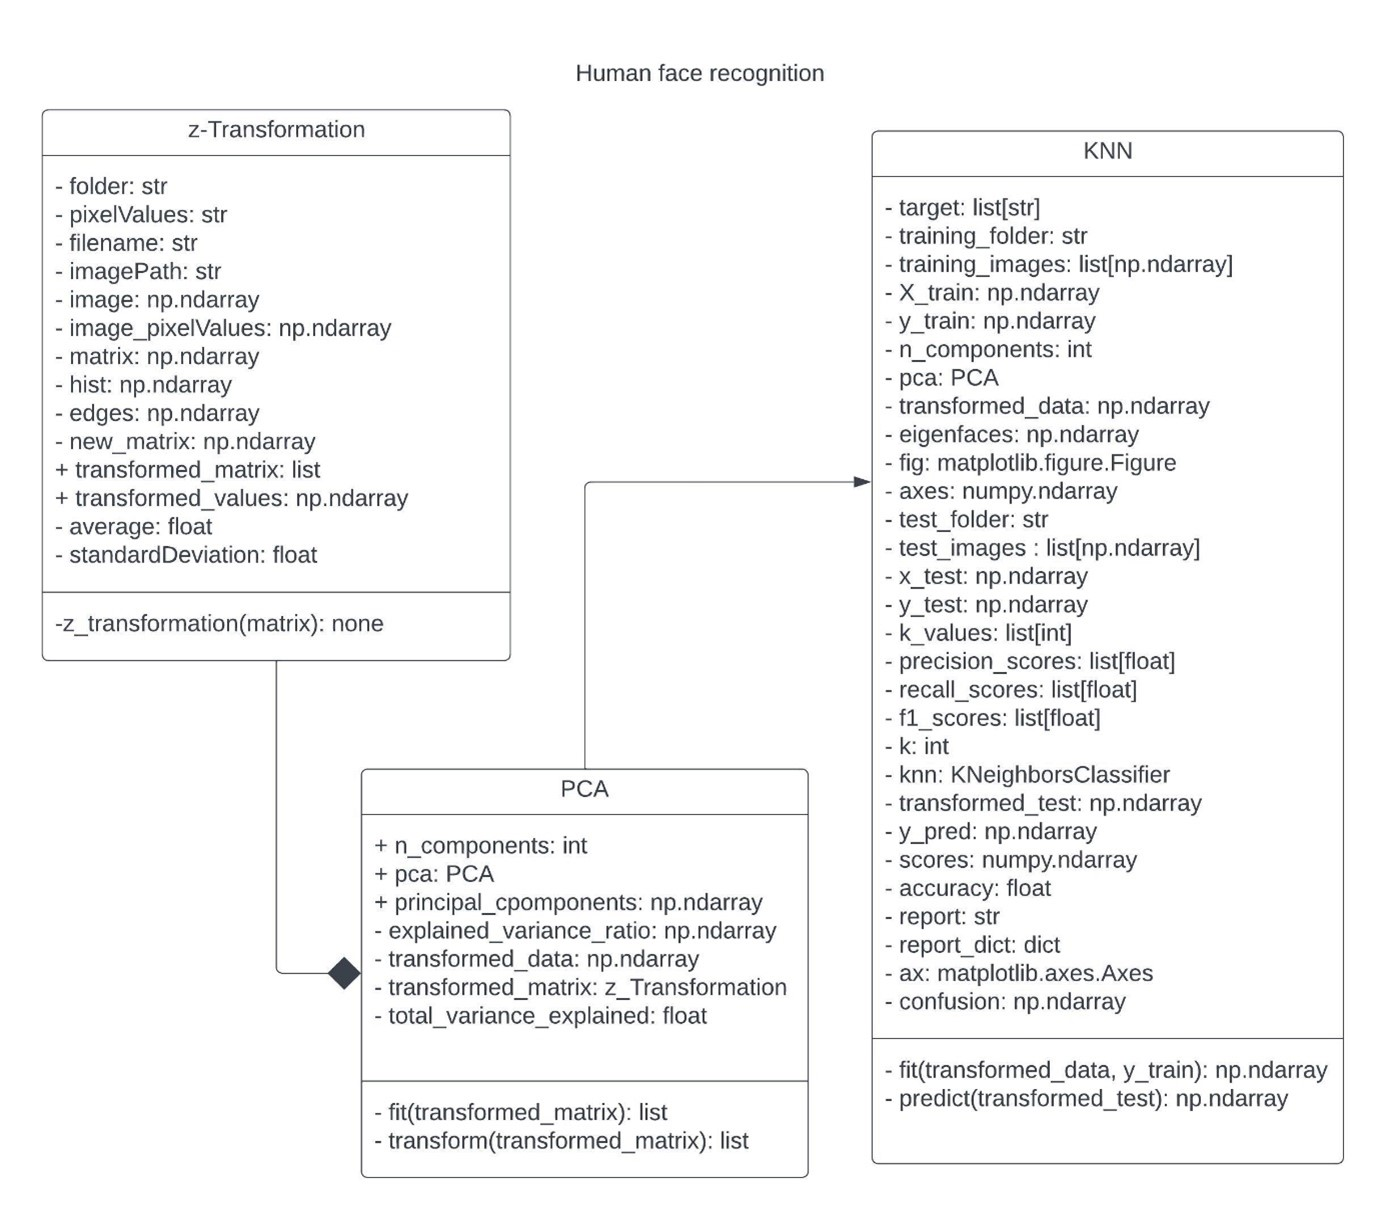

In [5]:
from IPython.display import Image, display
display(Image(filename='pictures_for_report/UML Class Diagram.jpg'))

*Figure 1* shows the class diagram of our classes. The relationship between **‘z-Transformation’** and **‘PCA’** can be seen as composition, which means that one cannot exist without the other. The **‘PCA’** class depends on the **‘z-Transformation’** for the transformed matrix and uses it as part of its computation. However, the relationship between **‘PCA’** and **‘KNN’** is a simple dependency. The **‘KNN’** class depends on **‘PCA’** class for the *‘pca’* object and the *‘transformed_data’* variable. 

## Results


 
### Data split

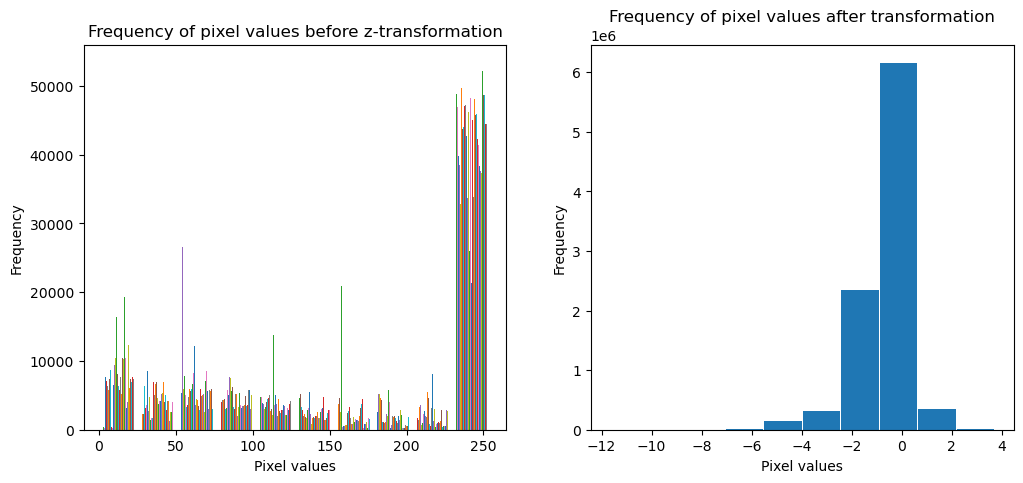

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from z_transformation import matrix, transformed_values

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

plt.subplot(121)
plt.hist(matrix, color = None)
plt.title("Frequency of pixel values before z-transformation")
plt.xlabel("Pixel values")
plt.ylabel("Frequency")

plt.subplot(122)
hist, edges = np.histogram(transformed_values)
plt.bar(edges[:-1], hist, width=1.5)
plt.xlabel("Pixel values")
plt.ylabel("Frequency")
plt.title("Frequency of pixel values after transformation");


<span style="font-size:0.8em;">**Figure 1: Frequency of pixel values before and after transformation.**</span>

The z-transformation’s success was checked with the values of the mean and standard deviation of the transformed data. The histograms are shown in figure 1. 
The goal was to achieve a normalized distribution with the z-transformation. This distribution is defined by a mean value of one and a standard deviation of zero. Therefore, to check whether the transformation was successful, the mean and standard deviation was calculated. The mean of transformed data was 1.8312017045227656 * 10<sup>-17</sup> and the standard deviation was 1.0000000000000004.

Figure 1 visualizes the transformation of the data by depicting the distribution of the pixel values before and after the z-transformation. While figure 1A shows a large distribution of the values, between 0 and 255, the transformed data lies within -7 and 3.


### PCA

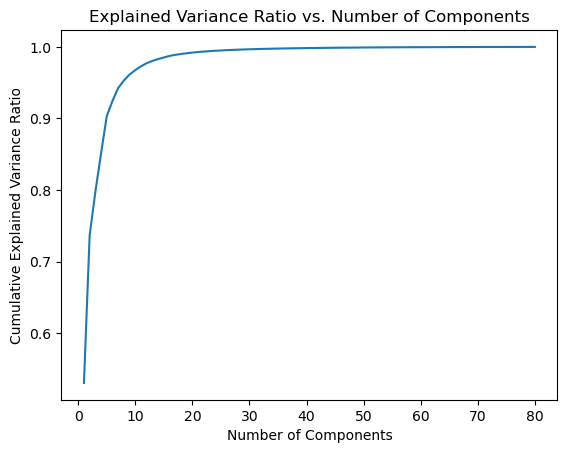

In [4]:
from PCA import n_components, explained_variance_ratio

plt.plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()


<span style="font-size:0.8em;">**Figure 2: cumulative explained Variance Ratio of the number of components.**</span>

The graph in figure 2 was used to determine the numbers of Principle Components of the PCA. We chose 80 Principle components. That causes a Total variance explained of 0.9884563771569146. The graph increases at first rapidly. This is a desirable pattern because it indicates that a small number of components can explain a large portion of the variability. As the number of components increases, the cumulative explained variance ratio continues to grow, but at a slower rate. This is expected because each additional component explains a smaller proportion of the remaining variability in the data.

### KNN

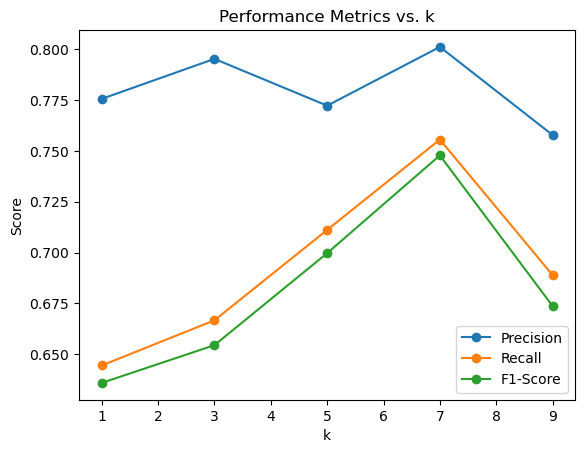

In [6]:
from KNN import k_values, precision_scores, recall_scores, f1_scores

plt.plot(k_values, precision_scores, marker='o', label='Precision')
plt.plot(k_values, recall_scores, marker='o', label='Recall')
plt.plot(k_values, f1_scores, marker='o', label='F1-Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Performance Metrics vs. k')
plt.legend()
plt.show()


<span style="font-size:0.8em;">**Figure 3: precision, recall and F1-score of different numbers of k.**</span>

Looking at Figure 3 it becomes visible that if k=7 the three curves of precision, recall and f1-score reach a global maximum. Therefore k=7 is chosen for our KNN algorithm.

Together with the number of Principal components = 80, our Accuracy is 75.56%.

Due to the fact that our training set is small (only 165 pictures in total) a Cross Fold Validation was additionally imported with five folds. The average Cross-Validation Score was 0.7199275362318841.

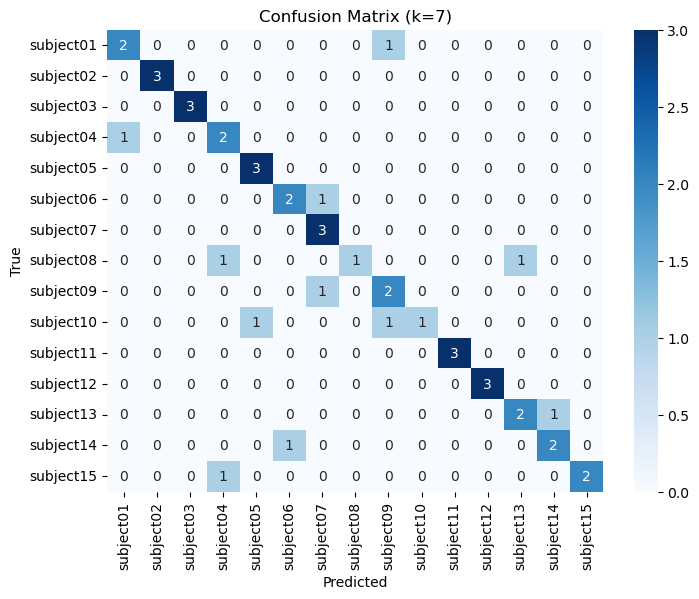

In [7]:
import seaborn as sns
from KNN import confusion_matrix, y_test, y_pred, target, k

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=target, yticklabels=target)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix (k={k})')
plt.show()


<span style="font-size:0.8em;">**Figure 4: Confusion Matrix for k=7.**</span>

The test set consists of three pictures of each subject. The confusion Matrix in figure 4 shows what each of the subjects was recognized as. If all three test pictures of all subjects were recognized correctly there would be a square diagonal matrix.


## Discussion



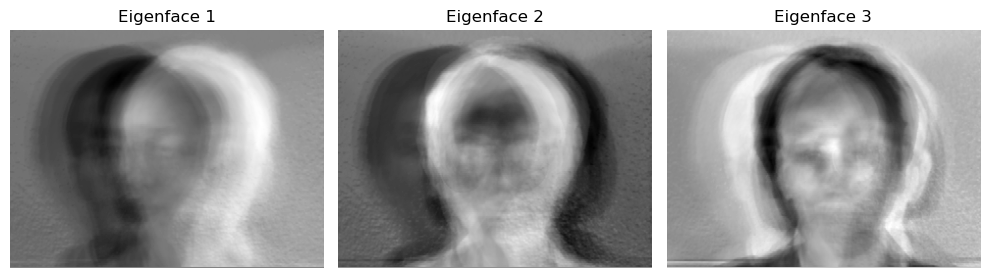

In [9]:
from KNN import eigenfaces

fig, axes = plt.subplots(1, 3, figsize=(10, 4)) 

eigenface_indices = [0, 1, 2]
for i, ax in zip(eigenface_indices, axes):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Eigenface {i+1}')
plt.tight_layout()
plt.show()

<span style="font-size:0.8em;">**Figure 5: Eigenfaces 1-3 of our training set.**</span>

## Further application

## References

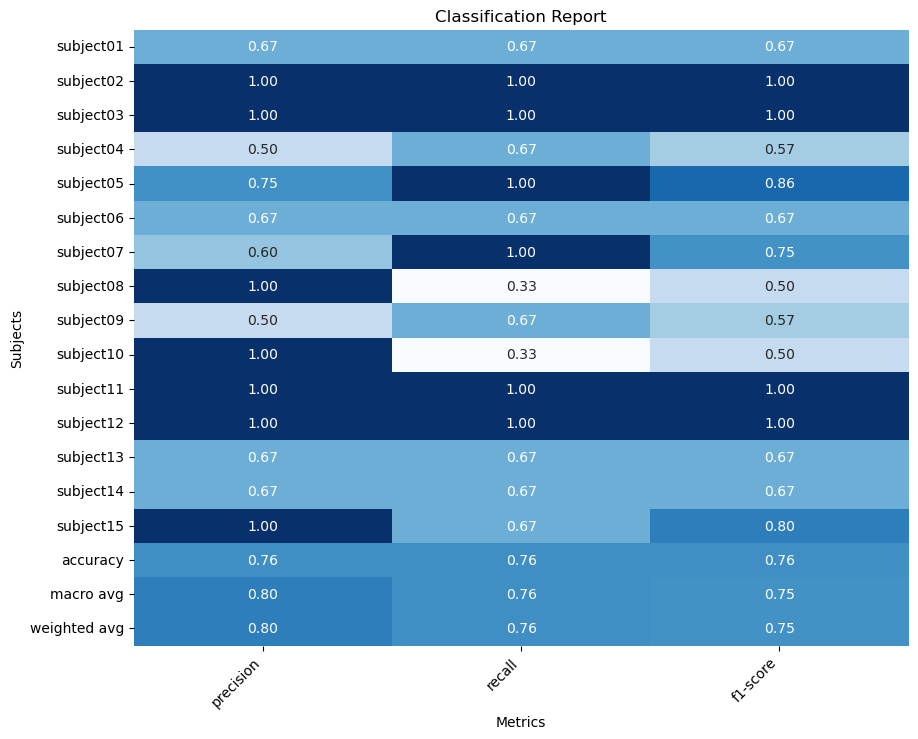

In [10]:
import pandas as pd
from KNN import report_dict

plt.figure(figsize=(10, 8))

ax = sns.heatmap(pd.DataFrame(report_dict).iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f', cbar=False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.xlabel('Metrics')
plt.ylabel('Subjects')
plt.title('Classification Report')
plt.show()


<span style="font-size:0.8em;">**Figure 6: Detailed classification report.**</span>